--- PHÂN TÍCH ĐIỂM TRUNG BÌNH THEO GIỚI TÍNH (GENDER) ---
              US                      FOMO                  Scarcity  \
            mean       std count      mean       std count      mean   
Gender                                                                 
Nam     4.221429  1.652750    84  4.307143  1.703136    84  4.497354   
Nữ      4.356522  1.609137   115  4.540870  1.577022   115  4.770048   

                        
             std count  
Gender                  
Nam     1.552442    84  
Nữ      1.458154   115  


--- PHÂN TÍCH ĐIỂM TRUNG BÌNH THEO NHÓM TUỔI (AGE) ---
                         US      FOMO
Age                                  
Trên 25 tuổi       5.000000  5.013115
Từ 18 đến 24 tuổi  3.989855  4.189855


--- PHÂN TÍCH ĐIỂM TRUNG BÌNH THEO THU NHẬP (INCOME) ---
                                             US  Scarcity
Income                                                   
Trên 5 triệu đồng                      4.898305  5.013183
Từ 2 triệu đồn

/tmp/ipykernel_588/880744368.py:72: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=clean_data, x='US', y='Income', palette='viridis', ci=None)
/tmp/ipykernel_588/880744368.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clean_data, x='US', y='Income', palette='viridis', ci=None)


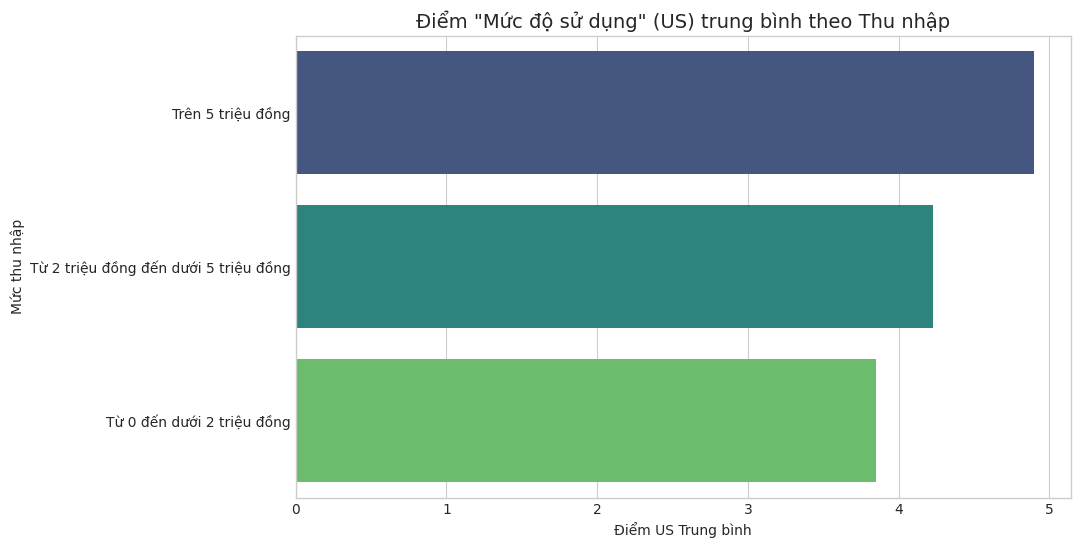

/tmp/ipykernel_588/880744368.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clean_data, x='Age', y='FOMO', palette='plasma')


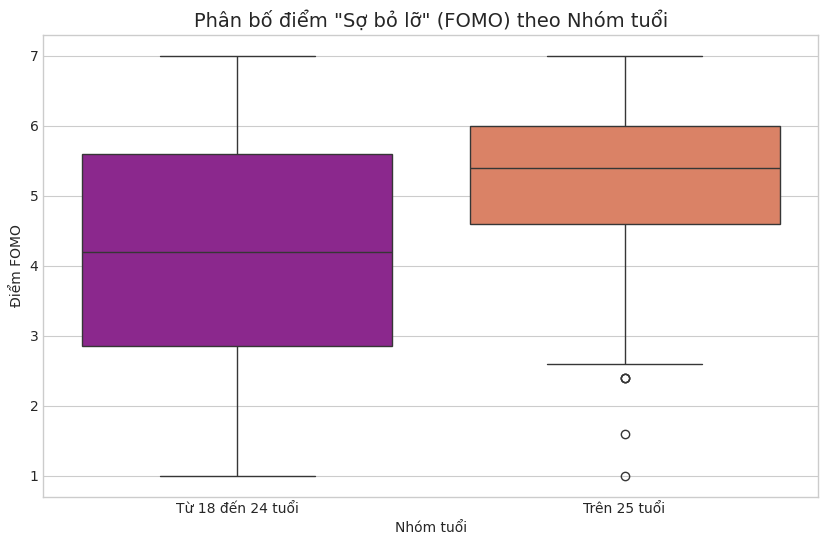



--- KẾT QUẢ KIỂM ĐỊNH THỐNG KÊ ---
1. Kiểm định T-test cho điểm US giữa Nam và Nữ:
   - P-value: 0.5637
   - Kết luận: Không có sự khác biệt có ý nghĩa thống kê về điểm US giữa Nam và Nữ.

2. Kiểm định ANOVA cho điểm US giữa các nhóm Thu nhập:
   - P-value: 0.0011
   - Kết luận: Có sự khác biệt có ý nghĩa thống kê về điểm US giữa ít nhất hai nhóm thu nhập.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway

# ==============================================================================
# BƯỚC 1: CHUẨN BỊ DỮ LIỆU (Tương tự như trước)
# ==============================================================================
# Đọc và làm sạch dữ liệu
try:
    data = pd.read_excel("data.xlsx")
    data.rename(columns={"SR4": "ST4"}, inplace=True)
except FileNotFoundError:
    print("Không tìm thấy file data.xlsx. Vui lòng kiểm tra lại.")
    # Dữ liệu giả để code có thể chạy
    data = pd.DataFrame(columns=['Gender', 'Age', 'Income', 'Edu', 'TOUI', 'ST1', 'ST2', 'ST3', 'ST4', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5', 'FOMO1', 'FOMO2', 'FOMO3', 'FOMO4', 'FOMO5', 'PU1', 'PU2', 'PU3', 'PU4', 'PU5', 'BE1', 'BE2', 'BE3', 'BE4', 'BE5', 'SE1', 'SE2', 'SE3', 'SE4', 'US1', 'US2', 'US3', 'US4', 'US5'])

# Ép kiểu các cột item sang số, chuyển lỗi thành NaN
item_cols = [col for col in data.columns if col not in ['Gender', 'Age', 'Income', 'Edu']]
for col in item_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Tính toán các biến tổng hợp
composite_vars = {
    'Scarcity': ['ST1','ST2','ST3','ST4','SQ1','SQ2','SQ3','SQ4','SQ5'],
    'FOMO': ['FOMO1','FOMO2','FOMO3','FOMO4','FOMO5'],
    'PU': ['PU1','PU2','PU3','PU4','PU5'],
    'BE': ['BE1','BE2','BE3','BE4','BE5'],
    'SE': ['SE1','SE2','SE3','SE4'],
    'US': ['US1','US2','US3','US4','US5']
}
for var, cols in composite_vars.items():
    data[var] = data[cols].mean(axis=1)

# Chọn các cột cần thiết và loại bỏ các hàng có dữ liệu thiếu
clean_data = data[['Gender', 'Age', 'Income', 'Edu'] + list(composite_vars.keys())].dropna()


# ==============================================================================
# BƯỚC 2: PHÂN TÍCH THEO NHÓM (GROUPED ANALYSIS)
# ==============================================================================
print("--- PHÂN TÍCH ĐIỂM TRUNG BÌNH THEO GIỚI TÍNH (GENDER) ---")
gender_analysis = clean_data.groupby('Gender').agg({
    'US': ['mean', 'std', 'count'],
    'FOMO': ['mean', 'std', 'count'],
    'Scarcity': ['mean', 'std', 'count']
})
print(gender_analysis)

print("\n\n--- PHÂN TÍCH ĐIỂM TRUNG BÌNH THEO NHÓM TUỔI (AGE) ---")
age_analysis = clean_data.groupby('Age').agg({
    'US': 'mean',
    'FOMO': 'mean'
}).sort_values(by='FOMO', ascending=False)
print(age_analysis)

print("\n\n--- PHÂN TÍCH ĐIỂM TRUNG BÌNH THEO THU NHẬP (INCOME) ---")
income_analysis = clean_data.groupby('Income').agg({
    'US': 'mean',
    'Scarcity': 'mean'
}).sort_values(by='US', ascending=False)
print(income_analysis)


# ==============================================================================
# BƯỚC 3: TRỰC QUAN HÓA CÁC MỐI QUAN HỆ
# ==============================================================================
plt.style.use('seaborn-v0_8-whitegrid')

# 1. So sánh điểm US giữa các nhóm Thu nhập
plt.figure(figsize=(10, 6))
sns.barplot(data=clean_data, x='US', y='Income', palette='viridis', ci=None)
plt.title('Điểm "Mức độ sử dụng" (US) trung bình theo Thu nhập', fontsize=14)
plt.xlabel('Điểm US Trung bình')
plt.ylabel('Mức thu nhập')
plt.show()

# 2. So sánh điểm FOMO giữa các nhóm Tuổi
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_data, x='Age', y='FOMO', palette='plasma')
plt.title('Phân bố điểm "Sợ bỏ lỡ" (FOMO) theo Nhóm tuổi', fontsize=14)
plt.xlabel('Nhóm tuổi')
plt.ylabel('Điểm FOMO')
plt.show()


# ==============================================================================
# BƯỚC 4: KIỂM ĐỊNH THỐNG KÊ (Để xác nhận mối quan hệ)
# ==============================================================================
print("\n\n--- KẾT QUẢ KIỂM ĐỊNH THỐNG KÊ ---")

# 1. Kiểm định T-test cho Giới tính (so sánh 2 nhóm)
# Lấy dữ liệu của Nam và Nữ cho biến US
us_nam = clean_data[clean_data['Gender'] == 'Nam']['US']
us_nu = clean_data[clean_data['Gender'] == 'Nữ']['US']

t_stat, p_value_gender = ttest_ind(us_nam, us_nu)
print(f"1. Kiểm định T-test cho điểm US giữa Nam và Nữ:")
print(f"   - P-value: {p_value_gender:.4f}")
if p_value_gender < 0.05:
    print("   - Kết luận: Có sự khác biệt có ý nghĩa thống kê về điểm US giữa Nam và Nữ.")
else:
    print("   - Kết luận: Không có sự khác biệt có ý nghĩa thống kê về điểm US giữa Nam và Nữ.")

# 2. Kiểm định ANOVA cho Thu nhập (so sánh 3+ nhóm)
# Tạo danh sách các nhóm dữ liệu điểm US theo từng mức thu nhập
income_groups = [group_data['US'] for name, group_data in clean_data.groupby('Income')]

f_stat, p_value_income = f_oneway(*income_groups)
print(f"\n2. Kiểm định ANOVA cho điểm US giữa các nhóm Thu nhập:")
print(f"   - P-value: {p_value_income:.4f}")
if p_value_income < 0.05:
    print("   - Kết luận: Có sự khác biệt có ý nghĩa thống kê về điểm US giữa ít nhất hai nhóm thu nhập.")
else:
    print("   - Kết luận: Không có sự khác biệt có ý nghĩa thống kê về điểm US giữa các nhóm thu nhập.")

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================================================================
# BƯỚC 1: CHUẨN BỊ DỮ LIỆU
# ==============================================================================
# Đọc và làm sạch dữ liệu
try:
    data = pd.read_excel("data.xlsx")
    data.rename(columns={"SR4": "ST4"}, inplace=True)
except FileNotFoundError:
    print("Không tìm thấy file data.xlsx. Vui lòng kiểm tra lại.")
    # Dữ liệu giả để code có thể chạy
    data = pd.DataFrame(columns=['Gender', 'Age', 'Income', 'Edu', 'TOUI', 'ST1', 'ST2', 'ST3', 'ST4', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5', 'US1', 'US2', 'US3', 'US4', 'US5'])

# Ép kiểu các cột item sang số, chuyển lỗi thành NaN
item_cols = [col for col in data.columns if col not in ['Gender', 'Age', 'Income', 'Edu']]
for col in item_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Tính toán các biến tổng hợp Scarcity và US
data['Scarcity'] = data[['ST1','ST2','ST3','ST4','SQ1','SQ2','SQ3','SQ4','SQ5']].mean(axis=1)
data['US'] = data[['US1','US2','US3','US4','US5']].mean(axis=1)

# Chọn các cột cần thiết và loại bỏ các hàng có dữ liệu thiếu
clean_data = data[['Gender', 'Age', 'Income', 'Edu', 'Scarcity', 'US']].dropna()

# *** TẠO NHÓM KHAN HIẾM (SCARCITY) ***
# Sử dụng qcut để chia dữ liệu Scarcity thành 3 nhóm có số lượng tương đương nhau
clean_data['Scarcity_Group'] = pd.qcut(clean_data['Scarcity'], 3, labels=['Thấp', 'Trung bình', 'Cao'])

print("--- Phân tích Tương tác: Khan hiếm và Các yếu tố Nhân khẩu học ảnh hưởng đến Mức độ sử dụng (US) ---")

# ==============================================================================
# BƯỚC 2: PHÂN TÍCH VÀ TRỰC QUAN HÓA TƯƠNG TÁC
# ==============================================================================
# Danh sách các biến nhân khẩu học cần phân tích
demographic_vars = ['Gender', 'Age', 'Income', 'Edu', 'TOUI]

for demographic in demographic_vars:
    print(f"\n\n--- Phân tích tương tác theo: {demographic} ---")
    
    # 1. TÍNH TOÁN VÀ IN BẢNG
    # Tính điểm US trung bình cho mỗi nhóm con
    interaction_table = clean_data.groupby([demographic, 'Scarcity_Group'])['US'].mean().unstack()
    
    print("Bảng điểm US trung bình:")
    print(interaction_table)
    
    # 2. VẼ BIỂU ĐỒ TƯƠNG TÁC
    plt.figure(figsize=(12, 7))
    sns.pointplot(data=clean_data, x='Scarcity_Group', y='US', hue=demographic,
                  ci=None, palette='tab10', dodge=True)
    
    plt.title(f'Tương tác giữa Mức độ Khan hiếm và "{demographic}"\nlên Mức độ sử dụng (US)', fontsize=15)
    plt.xlabel('Mức độ Khan hiếm', fontsize=12)
    plt.ylabel('Điểm US Trung bình (Mức độ sử dụng)', fontsize=12)
    plt.legend(title=demographic, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

SyntaxError: unterminated string literal (detected at line 39) (418081974.py, line 39)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================================================================
# STEP 1: PREPARE THE DATA
# ==============================================================================
# Load and clean the data
try:
    # Đọc file gốc từ người dùng
    data = pd.read_excel("data.xlsx")
    data.rename(columns={"SR4": "ST4"}, inplace=True)
except FileNotFoundError:
    print("data.xlsx not found. Please check the file path.")
    # Dữ liệu giả để code có thể chạy
    data = pd.DataFrame(columns=['Gender', 'Age', 'Income', 'Edu', 'TOUI', 'ST1', 'ST2', 'ST3', 'ST4', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5', 'US1', 'US2', 'US3', 'US4', 'US5'])

# Convert item columns to numeric, coercing errors to NaN
item_cols = [col for col in data.columns if col not in ['Gender', 'Age', 'Income', 'Edu']]
for col in item_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Calculate composite variables for Scarcity and US
data['Scarcity'] = data[['ST1','ST2','ST3','ST4','SQ1','SQ2','SQ3','SQ4','SQ5']].mean(axis=1)
data['US'] = data[['US1','US2','US3','US4','US5']].mean(axis=1)

# Select necessary columns and drop rows with missing data
clean_data = data[['Gender', 'Age', 'Income', 'Edu', 'TOUI', 'Scarcity', 'US']].dropna()

# Create Scarcity groups with English labels
clean_data['Scarcity_Group'] = pd.qcut(clean_data['Scarcity'], 3, labels=['Low', 'Medium', 'High'])

# Create TOUI (Time on Using Internet) groups with English labels
clean_data['TOUI_Group'] = pd.qcut(clean_data['TOUI'], 3, labels=['Low', 'Medium', 'High'])

# ==============================================================================
# STEP 2: GENERATE INTERACTION TABLES AND PLOTS
# ==============================================================================

# List of demographic and behavioral variables to analyze
analysis_vars = ['Gender', 'Age', 'Income', 'Edu', 'TOUI_Group']
# English names for titles and print statements
analysis_names = ['Gender', 'Age', 'Income', 'Education', 'Time on Internet']

print("=====================================================")
print(" INTERACTION ANALYSIS TABLES: SCARCITY & DEMOGRAPHICS")
print("=====================================================")

# Loop through each variable to print the table first
for var, name in zip(analysis_vars, analysis_names):
    print(f"\n\n--- Phân tích tương tác theo: {name} ---")
    print("Bảng điểm US trung bình:")
    
    # Calculate the interaction table by grouping by the demographic variable and Scarcity_Group
    interaction_table = clean_data.groupby([var, 'Scarcity_Group'])['US'].mean().unstack()
    
    # Print the resulting table
    print(interaction_table)


# --- Plotting Section ---
# Create a figure and a 3x2 grid of subplots for visualization
fig, axes = plt.subplots(3, 2, figsize=(18, 21))
fig.suptitle('Interaction Analysis of Scarcity and Demographics on Usage Level (US)', fontsize=22)

# Flatten the 2D axes array to a 1D array for easier looping
axes = axes.flatten()

# Loop through each variable again to plot on its corresponding subplot
for i, (var, name) in enumerate(zip(analysis_vars, analysis_names)):
    ax = axes[i]
    sns.pointplot(data=clean_data, x='Scarcity_Group', y='US', hue=var,
                  ci=None, palette='viridis', dodge=True, ax=ax)
    
    # Customize each subplot with English labels
    ax.set_title(f'Interaction by "{name}"', fontsize=16)
    ax.set_xlabel('Scarcity Level', fontsize=12)
    ax.set_ylabel('Mean US Score', fontsize=12)
    ax.grid(True)
    ax.legend(title=name)

# Turn off the last empty subplot
fig.delaxes(axes[5])

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.savefig('tương tác')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Thiết lập style chung
sns.set(style="whitegrid", font_scale=1.1)

# Hàm tiện dụng để vẽ biểu đồ so sánh giữa Scarcity và US theo nhóm
def plot_interaction(x, y, hue, title):
    plt.figure(figsize=(7,5))
    sns.pointplot(data=data, x=x, y=y, hue=hue, 
                  palette='Set2', dodge=True, markers='o', linestyles='-', ci=None)
    plt.title(title, fontsize=13, weight='bold')
    plt.ylabel("Trung bình hành vi mua sắm bốc đồng (US)")
    plt.xlabel("Mức độ khan hiếm (Scarcity Group)")
    plt.legend(title=hue)
    plt.tight_layout()
    plt.show()


# 1️⃣ Giới tính và hiệu ứng khan hiếm
plot_interaction(x='Scarcity_Group', y='US', hue='Gender',
                 title='Tương tác giữa Scarcity và Giới tính đối với hành vi mua sắm')

# 2️⃣ Độ tuổi và hiệu ứng khan hiếm
plot_interaction(x='Scarcity_Group', y='US', hue='Age',
                 title='Tương tác giữa Scarcity và Độ tuổi đối với hành vi mua sắm')

# 3️⃣ Thu nhập và hiệu ứng khan hiếm
plot_interaction(x='Scarcity_Group', y='US', hue='Income',
                 title='Tương tác giữa Scarcity và Thu nhập đối với hành vi mua sắm')

# 4️⃣ Trình độ học vấn và hiệu ứng khan hiếm
plot_interaction(x='Scarcity_Group', y='US', hue='Edu',
                 title='Tương tác giữa Scarcity và Trình độ học vấn đối với hành vi mua sắm')

# 5️⃣ Thời gian sử dụng Internet và hiệu ứng khan hiếm
plot_interaction(x='Scarcity_Group', y='US', hue='TOUI_Group',
                 title='Tương tác giữa Scarcity và Thời gian sử dụng Internet đối với hành vi mua sắm')


--- Phân bổ nhóm TOUI_Group mới (chia theo giá trị): ---
TOUI_Group
Low (1-3)        33
Medium (4-6)    102
High (7-8)       64
Name: count, dtype: int64


 INTERACTION ANALYSIS TABLES: SCARCITY & DEMOGRAPHICS


--- Phân tích tương tác theo: Gender ---
Bảng điểm US trung bình:
Scarcity_Group       Low    Medium      High
Gender                                      
Nam             3.135294  4.283333  5.584615
Nữ              3.076923  4.388571  5.546341


--- Phân tích tương tác theo: Age ---
Bảng điểm US trung bình:
Scarcity_Group          Low    Medium      High
Age                                            
Trên 25 tuổi       3.821053  4.642857  5.978571
Từ 18 đến 24 tuổi  2.851852  4.253333  5.261538


--- Phân tích tương tác theo: Income ---
Bảng điểm US trung bình:
Scarcity_Group                              Low    Medium      High
Income                                                             
Trên 5 triệu đồng                      3.910000  4.800000  5.783333
Từ 0 đến dưới

/tmp/ipykernel_588/706067659.py:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interaction_table = clean_data.groupby([var, 'Scarcity_Group'])['US'].mean().unstack()
/tmp/ipykernel_588/706067659.py:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interaction_table = clean_data.groupby([var, 'Scarcity_Group'])['US'].mean().unstack()
/tmp/ipykernel_588/706067659.py:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inte

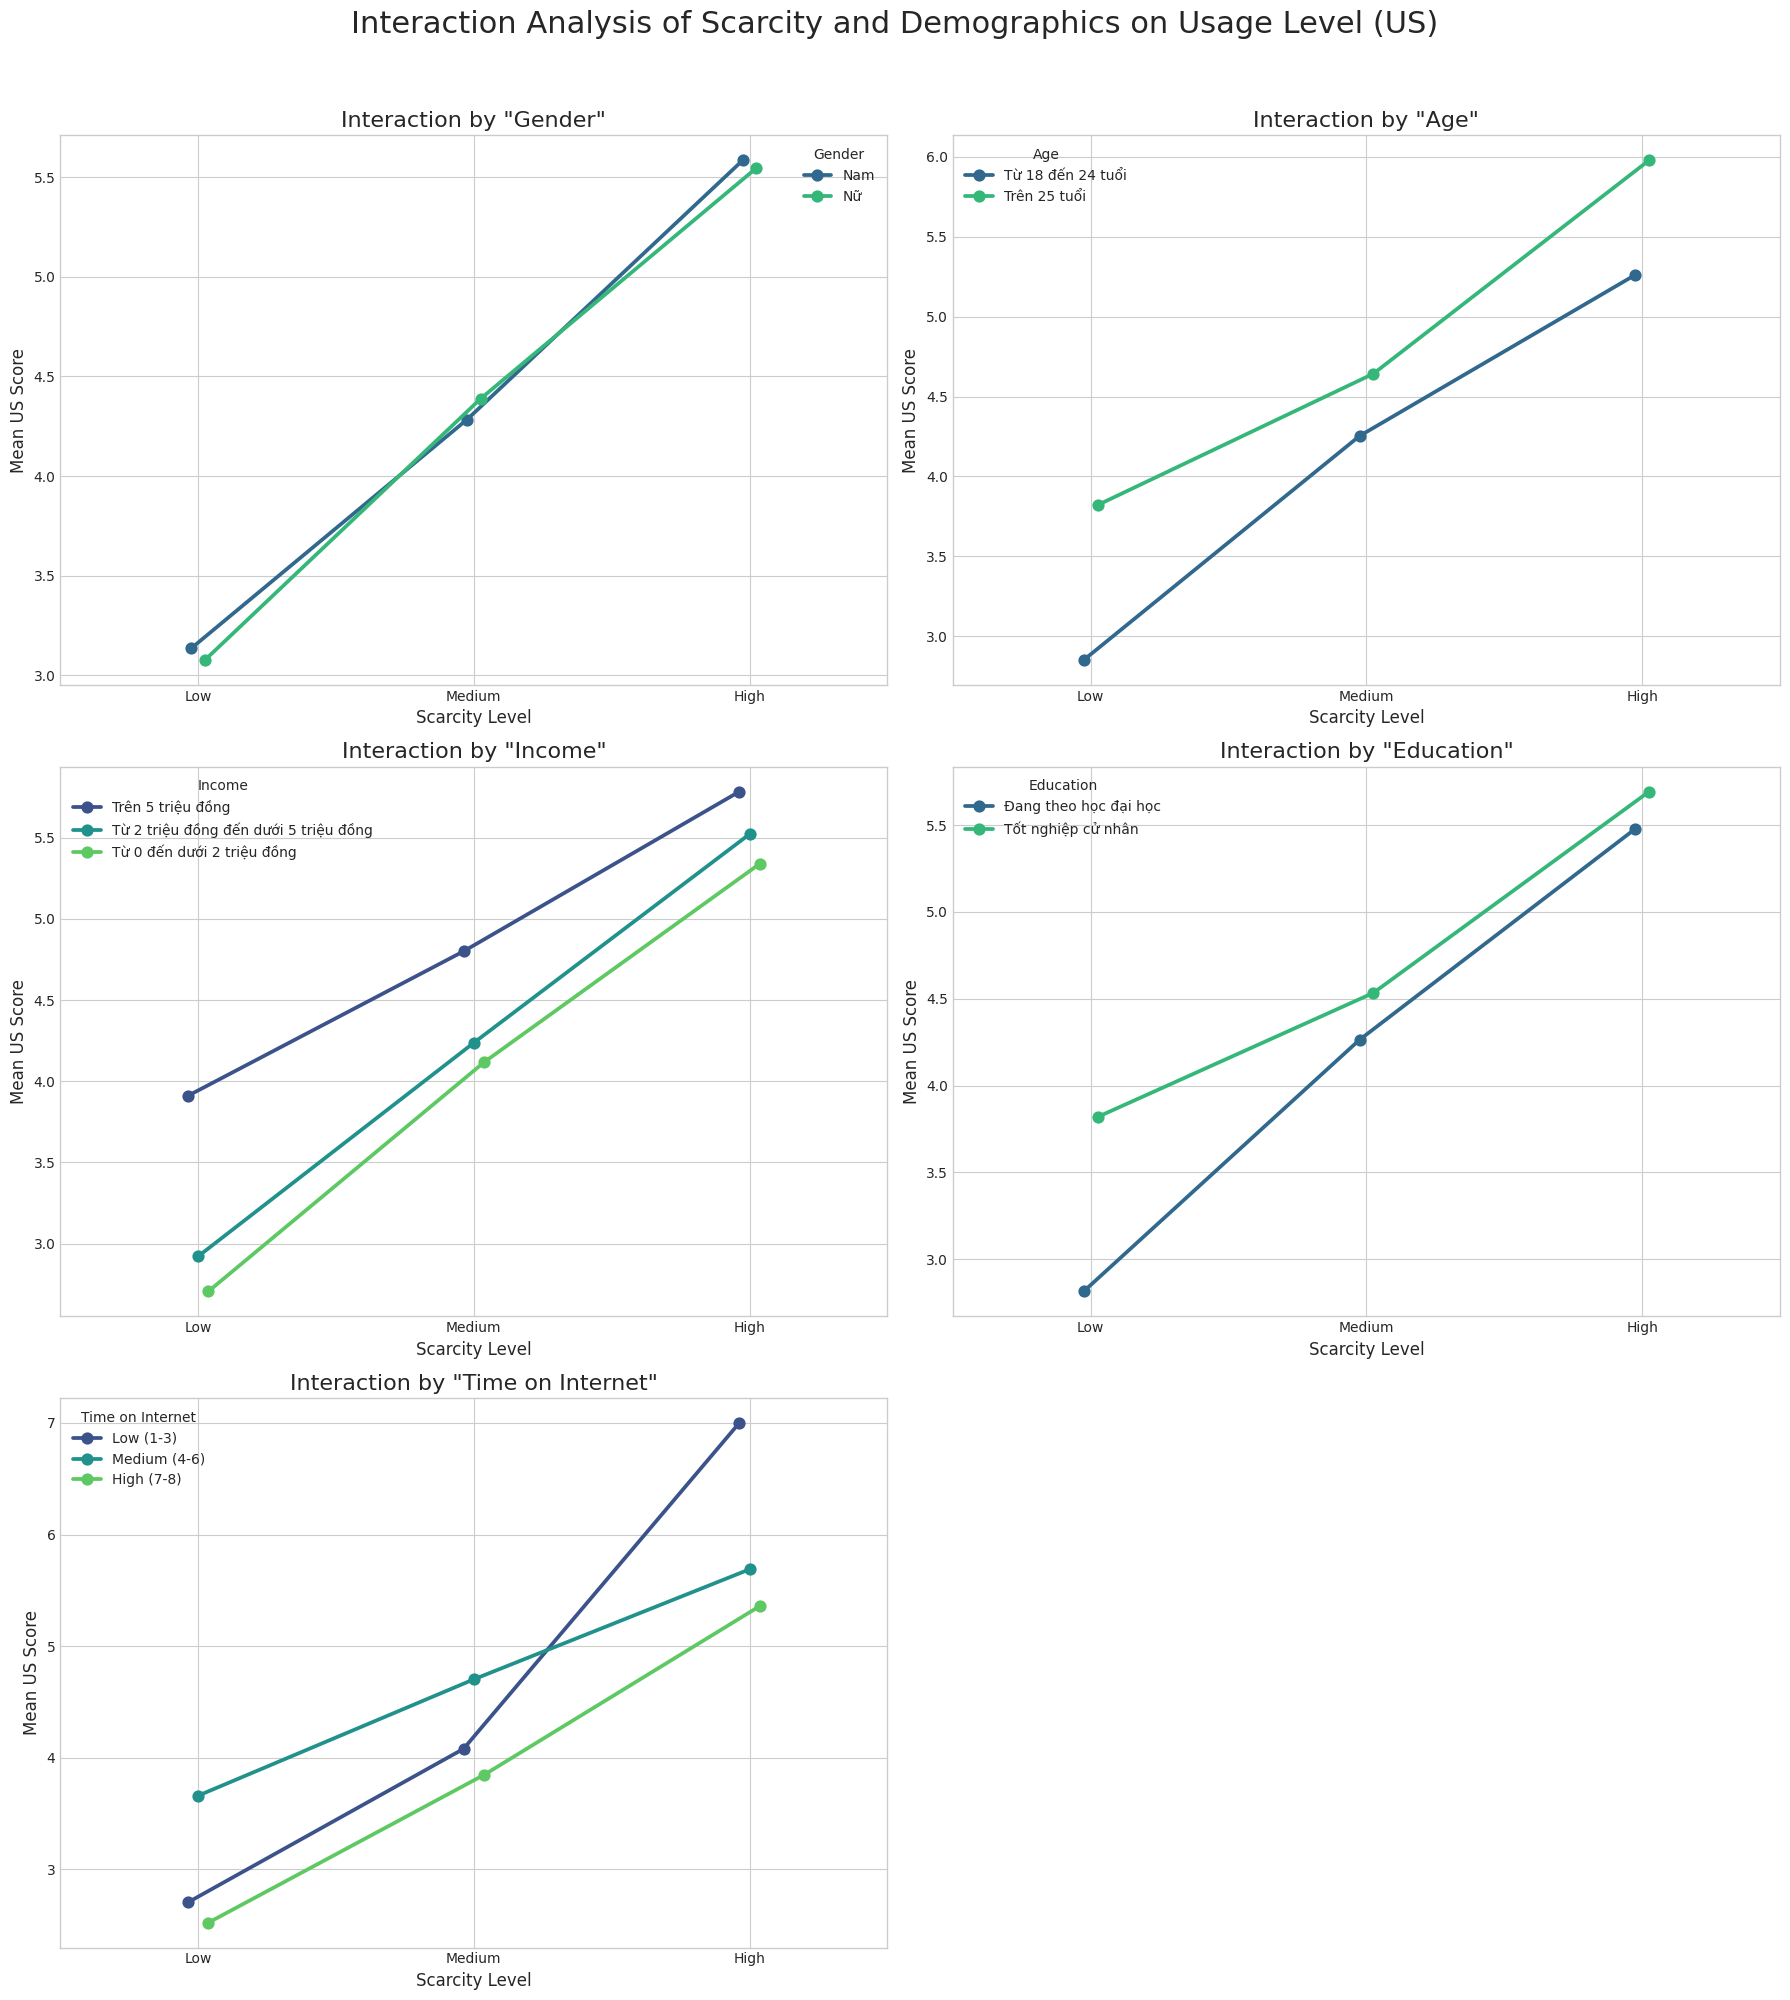

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================================================================
# STEP 1: PREPARE THE DATA
# ==============================================================================
# Load and clean the data
try:
    # Đọc file gốc từ người dùng
    data = pd.read_excel("data.xlsx")
    data.rename(columns={"SR4": "ST4"}, inplace=True)
except FileNotFoundError:
    print("data.xlsx not found. Please check the file path.")
    # Dữ liệu giả để code có thể chạy
    data = pd.DataFrame(columns=['Gender', 'Age', 'Income', 'Edu', 'TOUI', 'ST1', 'ST2', 'ST3', 'ST4', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5', 'US1', 'US2', 'US3', 'US4', 'US5'])

# Convert item columns to numeric, coercing errors to NaN
# Đảm bảo TOUI cũng được ép kiểu số
item_cols = [col for col in data.columns if col not in ['Gender', 'Age', 'Income', 'Edu']]
for col in item_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Calculate composite variables for Scarcity and US
data['Scarcity'] = data[['ST1','ST2','ST3','ST4','SQ1','SQ2','SQ3','SQ4','SQ5']].mean(axis=1)
data['US'] = data[['US1','US2','US3','US4','US5']].mean(axis=1)

# Select necessary columns and drop rows with missing data
clean_data = data[['Gender', 'Age', 'Income', 'Edu', 'TOUI', 'Scarcity', 'US']].dropna()

# Create Scarcity groups with English labels (vẫn dùng qcut)
clean_data['Scarcity_Group'] = pd.qcut(clean_data['Scarcity'], 3, labels=['Low', 'Medium', 'High'])


# *** PHẦN ĐÃ CHỈNH SỬA THEO YÊU CẦU CỦA BẠN ***
# Thay vì pd.qcut, chúng ta dùng pd.cut để chia TOUI (thang đo 8 điểm)
# Bạn có thể thay đổi các mốc [0, 3, 6, 8] nếu muốn
# (0, 3] -> bao gồm điểm 1, 2, 3
# (3, 6] -> bao gồm điểm 4, 5, 6
# (6, 8] -> bao gồm điểm 7, 8
bins = [0, 3, 6, 8]
labels = ['Low (1-3)', 'Medium (4-6)', 'High (7-8)']

# Tạo nhóm TOUI_Group dựa trên các mốc giá trị cố định
clean_data['TOUI_Group'] = pd.cut(clean_data['TOUI'], bins=bins, labels=labels, right=True)

# In ra kiểm tra (tùy chọn)
print("--- Phân bổ nhóm TOUI_Group mới (chia theo giá trị): ---")
print(clean_data['TOUI_Group'].value_counts().sort_index())
print("\n")
# *** KẾT THÚC PHẦN CHỈNH SỬA ***


# ==============================================================================
# STEP 2: GENERATE INTERACTION TABLES AND PLOTS (Giữ nguyên)
# ==============================================================================

# List of demographic and behavioral variables to analyze
analysis_vars = ['Gender', 'Age', 'Income', 'Edu', 'TOUI_Group']
# English names for titles and print statements
analysis_names = ['Gender', 'Age', 'Income', 'Education', 'Time on Internet']

print("=====================================================")
print(" INTERACTION ANALYSIS TABLES: SCARCITY & DEMOGRAPHICS")
print("=====================================================")

# Loop through each variable to print the table first
for var, name in zip(analysis_vars, analysis_names):
    print(f"\n\n--- Phân tích tương tác theo: {name} ---")
    print("Bảng điểm US trung bình:")
    
    # Calculate the interaction table by grouping by the demographic variable and Scarcity_Group
    interaction_table = clean_data.groupby([var, 'Scarcity_Group'])['US'].mean().unstack()
    
    # Print the resulting table
    print(interaction_table)


# --- Plotting Section ---
# Create a figure and a 3x2 grid of subplots for visualization
fig, axes = plt.subplots(3, 2, figsize=(18, 21))
fig.suptitle('Interaction Analysis of Scarcity and Demographics on Usage Level (US)', fontsize=22)

# Flatten the 2D axes array to a 1D array for easier looping
axes = axes.flatten()

# Loop through each variable again to plot on its corresponding subplot
for i, (var, name) in enumerate(zip(analysis_vars, analysis_names)):
    ax = axes[i]
    # Cập nhật ci=None thành errorbar=None (theo chuẩn mới của Seaborn)
    sns.pointplot(data=clean_data, x='Scarcity_Group', y='US', hue=var,
                  errorbar=None, palette='viridis', dodge=True, ax=ax)
    
    # Customize each subplot with English labels
    ax.set_title(f'Interaction by "{name}"', fontsize=16)
    ax.set_xlabel('Scarcity Level', fontsize=12)
    ax.set_ylabel('Mean US Score', fontsize=12)
    ax.grid(True)
    ax.legend(title=name)

# Turn off the last empty subplot
fig.delaxes(axes[5])

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.savefig('tương tác.png') # Lưu lại file ảnh
plt.show()